In [2]:
#Initialize modules
import csv
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [15]:
#Get csv's into DataFrame

popCsv = 'Data/Population_Data_All_States.csv'
weatherCsv = 'Data/NY_Weather_2015-07-01_to_2016-05-31.csv'
airCsv1 = 'Data/2017_AirTravel_T_T100D_MARKET_ALL_CARRIER.csv'
airCsv2 = 'Data/2016_AirTravel_T100D_MARKET_ALL_CARRIER.csv'
airCsv3 = 'data/2015_AirTravel_T_T100D_MARKET_ALL_CARRIER.csv'

df_population = pd.read_csv(popCsv)
df_weather = pd.read_csv(weatherCsv)
df_airtravel1 = pd.read_csv(airCsv1)
df_airtravel2 = pd.read_csv(airCsv2)
df_airtravel3 = pd.read_csv(airCsv3)
df_population.head()

,Geographical_Location,Census_2010,Census_2010_Est_Base,2010,2011,2012,2013,2014,2015,2016
0,United States,"308,745,538","308,758,105","309,348,193","311,663,358","313,998,379","316,204,908","318,563,456","320,896,618","323,127,513"
1,Northeast,"55,317,240","55,318,353","55,388,056","55,632,766","55,829,059","55,988,771","56,116,791","56,184,737","56,209,510"
2,Midwest,"66,927,001","66,929,825","66,978,602","67,153,331","67,332,320","67,543,948","67,726,368","67,838,387","67,941,429"
3,South,"114,555,744","114,563,005","114,863,114","116,061,801","117,299,171","118,424,320","119,696,311","121,039,206","122,319,574"
4,West,"71,945,553","71,946,922","72,118,421","72,815,460","73,537,829","74,247,869","75,023,986","75,834,288","76,657,000"


In [16]:
df_weather.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,TOBS,WEEK
0,US1NYCQ0005,"KENNEDY 0.3 NE, NY US",42.1594,-79.0967,391.4,7/1/2015,NaN,0.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1NYCQ0005,"KENNEDY 0.3 NE, NY US",42.1594,-79.0967,391.4,7/2/2015,NaN,0.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1NYCQ0005,"KENNEDY 0.3 NE, NY US",42.1594,-79.0967,391.4,7/3/2015,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US1NYCQ0005,"KENNEDY 0.3 NE, NY US",42.1594,-79.0967,391.4,7/4/2015,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1NYCQ0005,"KENNEDY 0.3 NE, NY US",42.1594,-79.0967,391.4,7/5/2015,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df_air = df_airtravel1
df_air = df_air.append(df_airtravel2)
df_air = df_air.append(df_airtravel3)
len(df_air)

54769

In [29]:
df_air.head()

,PASSENGERS,DISTANCE,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,YEAR,MONTH,Unnamed: 19
0,0.0,249.0,09Q,21161.0,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",10540,1054003,30540,BED,"Bedford, MA",MA,15096,1509602,35096,SYR,"Syracuse, NY",NY,2017,1,NaN
1,0.0,163.0,09Q,21161.0,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",11764,1176402,31764,FRG,"East Farmingdale, NY",NY,10540,1054003,30540,BED,"Bedford, MA",MA,2017,1,NaN
2,0.0,749.0,09Q,21161.0,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",11764,1176402,31764,FRG,"East Farmingdale, NY",NY,13232,1323202,30977,MDW,"Chicago, IL",IL,2017,1,NaN
3,0.0,1430.0,09Q,21161.0,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",11789,1178904,30194,FTW,"Dallas/Fort Worth, TX",TX,11764,1176402,31764,FRG,"East Farmingdale, NY",NY,2017,1,NaN
4,0.0,525.0,09Q,21161.0,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",11995,1199502,31995,GSO,"Greensboro/High Point, NC",NC,15096,1509602,35096,SYR,"Syracuse, NY",NY,2017,1,NaN


In [39]:
df_air_ny = df_air.loc[df_air['DEST_STATE_ABR']=='NY']
len(df_air_ny)

28656

In [40]:
df_air_ny_grp = df_air_ny[['YEAR','MONTH','PASSENGERS','DISTANCE','ORIGIN','ORIGIN_CITY_NAME','ORIGIN_STATE_ABR','DEST','DEST_CITY_NAME','DEST_STATE_ABR']]

df_air_ny_grp.head()

,YEAR,MONTH,PASSENGERS,DISTANCE,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,DEST_STATE_ABR
0,2017,1,0.0,249.0,BED,"Bedford, MA",MA,SYR,"Syracuse, NY",NY
3,2017,1,0.0,1430.0,FTW,"Dallas/Fort Worth, TX",TX,FRG,"East Farmingdale, NY",NY
4,2017,1,0.0,525.0,GSO,"Greensboro/High Point, NC",NC,SYR,"Syracuse, NY",NY
7,2017,1,0.0,2477.0,LAX,"Los Angeles, CA",CA,HPN,"White Plains, NY",NY
8,2017,1,0.0,568.0,LEX,"Lexington, KY",KY,SYR,"Syracuse, NY",NY


In [41]:
df_air_ny_grp = df_air_ny_grp.groupby(['MONTH'])
df_air_summary = pd.DataFrame(df_air_ny_grp[['PASSENGERS','DISTANCE']].mean())
df_air_summary = df_air_summary.reset_index()
df_air_summary.sort_values(by=['MONTH'],ascending=True)
df_air_summary.head()

,MONTH,PASSENGERS,DISTANCE
0,1,2553.860633,826.922574
1,2,2566.158563,805.946662
2,3,3142.245197,820.132379
3,4,3162.484988,810.891911
4,5,3494.688955,791.226081


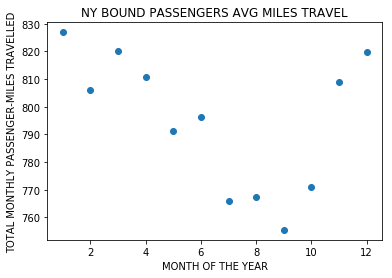

In [43]:
plt.scatter(df_air_summary['MONTH'],df_air_summary['DISTANCE'])
plt.xlabel('MONTH OF THE YEAR')
plt.ylabel('TOTAL MONTHLY PASSENGER-MILES TRAVELLED')
plt.title('NY BOUND PASSENGERS AVG MILES TRAVEL')
plt.show()